<a href="https://colab.research.google.com/github/krissivolga29-commits/analytics_big_data/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from statsmodels.formula.api import ols

In [ ]:
def check_normality(data):
    #
    stat, p = st.shapiro(data)
    print(f'stat = {stat:.3f}, p = {p:.5f}')
    if p >0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
check_normality

<function __main__.check_normality(data)>

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

stat, p = st.ttest_ind(mens, womens)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 28.31364, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


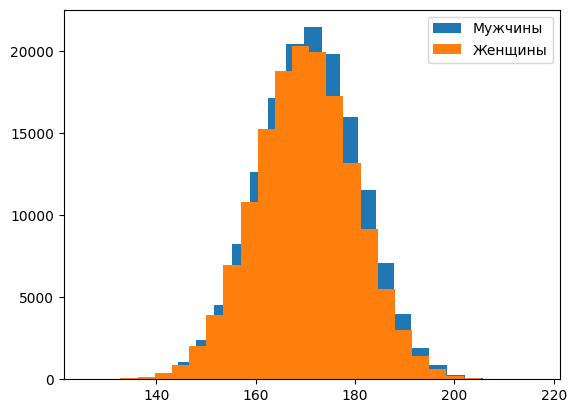

In [ ]:
plt.hist(mens, label="Мужчины", bins=25); #Выборка по мужчинам
plt.hist(womens, label="Женщины", bins=25);  #Выборка по женщинам
plt.legend()
plt.show()

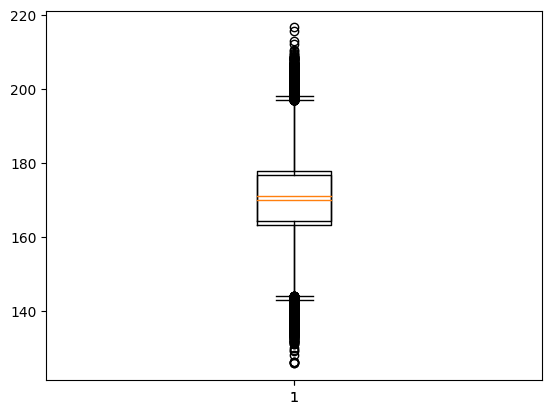

In [ ]:
plt.boxplot(mens);
plt.boxplot(womens);

**Вывод:** В виду большого объема выборки (150000) тест становится гиперчувствительным и крайне малая с практической точки зрения разница становится статистически значимой. Можно сделать вывод, что для большого объема выборки уровень значимости a=0,001 слишком мал. Результат является не полезным с практической точки зрения, и может ввести в заблуждение. Согласно графиков среднее значение отличается, но не намного.

In [ ]:
# Если мы поменяем размер выборки предположим на 150, что изменится?
np.random.seed(42) #фиксация случайности

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
mens  = st.norm.rvs(loc=171, scale=10, size=150)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150)  # Выборка женщин со средним ростом 170

stat, p = st.ttest_ind(mens, womens)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -0.47192, p = 0.63733
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Для маленькой выборки с заданным уровнем значимости a=0.001 средние, вероятно, одинаковы.

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

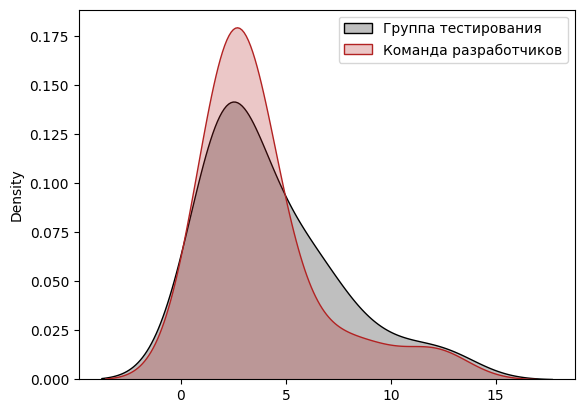

In [ ]:
# Определимся с распределением данных
sns.kdeplot(test_team, label="Группа тестирования", fill = True, color = '#000000')
sns.kdeplot(developer_team, label="Команда разработчиков", fill = True, color = '#B22222')
plt.legend()
plt.show()

In [ ]:
stat, p = st.shapiro(test_team)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.825, p = 0.00462
Вероятно не нормальное распределение


In [ ]:
stat, p = st.shapiro(developer_team)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.753, p = 0.00049
Вероятно не нормальное распределение


Распределение ненормальное, поэтому будем использовать критерий Манна-Уитни

In [ ]:
stat, p = st.mannwhitneyu(test_team, developer_team)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 151.50000, p = 0.82265
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


**Вывод.** Тест не показал наличие статистически значимой разницы в средней  сверхурочной работе - при текущих данных мы не можем утверждать, что есть разница между переутомлением двух команд.

А что если использовать тест Стъюдента, ведь распределения данных близк к нормальным. Для этого необходимо вначале проверить равенство вариаций.

In [ ]:
stat, p = st.levene(test_team, developer_team)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")
else:
    print("Отклоняем нулевую гипотезу >> Вариация в группах различается")

Статистика = 0.38191, p = 0.54096
Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая


In [ ]:
stat, p = st.ttest_ind(test_team, developer_team)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 0.47925, p = 0.63502
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


**Вывод то же.**Тест не показал наличие статистически значимой разницы в средней сверхурочной работе - при текущих данных мы не можем утверждать, что есть разница между переутомлением двух команд.

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

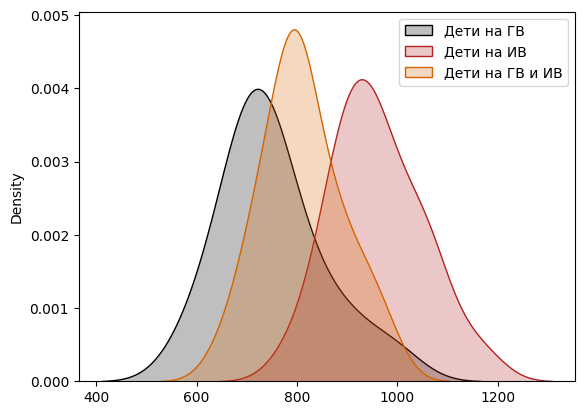

In [ ]:
# Определимся с распределением данных
sns.kdeplot(only_breast, label="Дети на ГВ", fill = True, color = '#000000')
sns.kdeplot(only_formula, label="Дети на ИВ", fill = True, color = '#B22222')
sns.kdeplot(both, label="Дети на ГВ и ИВ", fill = True, color = '#d46400')
plt.legend()
plt.show()

In [ ]:
stat, p = st.shapiro(only_breast)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.951, p = 0.46942
Вероятно нормальное распределение


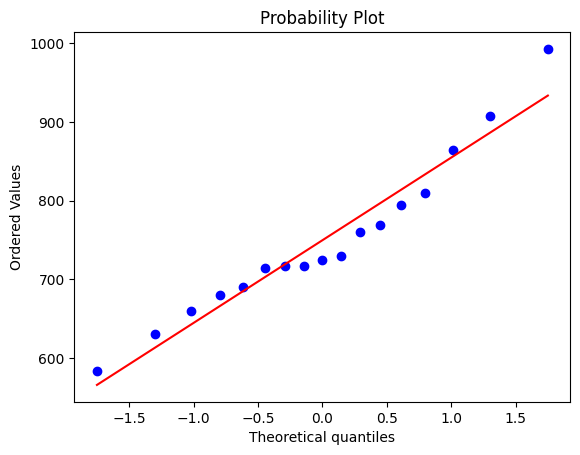

In [ ]:
res1 = st.probplot(only_breast, plot=plt)

In [ ]:
stat, p = st.shapiro(only_formula)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.976, p = 0.88790
Вероятно нормальное распределение


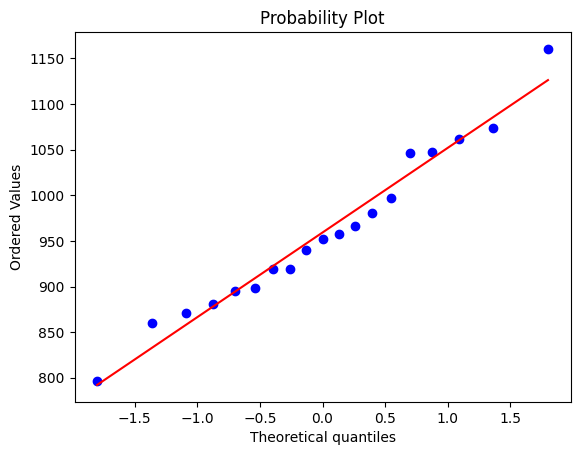

In [ ]:
res2 = st.probplot(only_formula, plot=plt)

In [ ]:
stat, p = st.shapiro(both)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.975, p = 0.79730
Вероятно нормальное распределение


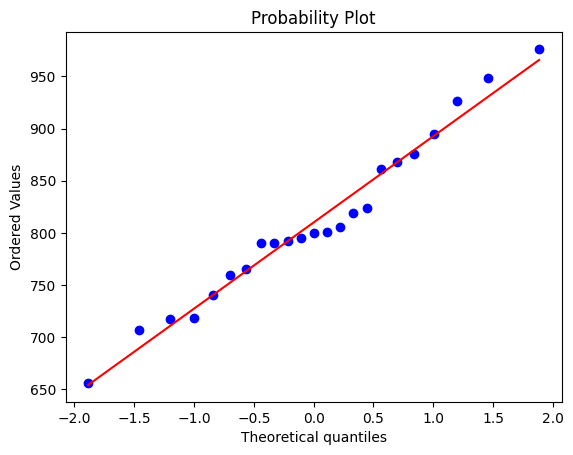

In [ ]:
res3 = st.probplot(both, plot=plt)

Распределение нормальное, будем использовать тест Стъюдента. Для этого сначала проверим равенство вариаций.

In [ ]:
stat, p = st.levene(only_breast, only_formula, both)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая")
else:
    print("Отклоняем нулевую гипотезу >> Вариация в группах различается")

Статистика = 0.26612, p = 0.76731
Не отклоняем нулевую гипотезу >> Вариация в группах одинаковая


In [ ]:
stat, p = st.ttest_ind(only_breast, only_formula)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = -6.57305, p = 0.00000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [ ]:
stat, p = st.ttest_ind(only_breast, both)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = -2.09223, p = 0.04315
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [ ]:
stat, p = st.ttest_ind(only_formula, both)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 5.72011, p = 0.00000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


Распределения по выборкам отличаются. Будем использовать множественное сравнения - критерий Тьюки

In [ ]:
# соединим массивы в один датафрейм
df= pd.concat([pd.Series(lst) for lst in [only_breast, only_formula, both]], axis=1)
df.columns = ['only_breast', 'only_formula', 'both']
df

,only_breast,only_formula,both
0,794.1,898.8,976.4
1,716.9,881.2,656.4
2,993.0,940.2,861.2
3,724.7,966.2,706.8
4,760.9,957.5,718.5
5,908.2,1061.7,717.1
6,659.3,1046.2,759.8
7,690.8,980.4,894.6
8,768.7,895.6,867.6
9,717.3,919.7,805.6


In [ ]:
df.describe()

,only_breast,only_formula,both
count,17.000000,19.000000,23.000000
mean,749.823529,959.215789,809.952174
std,102.007062,89.159004,79.859546
min,583.500000,796.300000,656.400000
25%,690.800000,897.200000,762.600000
50%,724.700000,952.500000,799.400000
75%,794.100000,1021.550000,864.400000
max,993.000000,1160.500000,976.400000


Для количественных данных, если в непрерывной величине есть выбросы, то стоит выбрать для замены медиану, если в непрерывной величине нет выбросов, то стоит выбрать среднее.
Для only_breast	only_formula выберем медиану, для both - среднее.

In [ ]:
(df.isna().mean() * 100).round(2)

only_breast     26.09
only_formula    17.39
both             0.00
dtype: float64

In [ ]:
#заполним пропуски средним значением по каждому признаку
df['only_breast'] = df['only_breast'].fillna(df['only_breast'].median())
df['only_formula'] = df['only_formula'].fillna(df['only_formula'].median())
df['both'] = df['both'].fillna(df['both'].mean())

In [ ]:
(df.isna().mean() * 100).round(2)

only_breast     0.0
only_formula    0.0
both            0.0
dtype: float64

In [ ]:
#дисперсионный анализ ANOVA
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

res = tukey_hsd(only_breast, only_formula, both)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -209.392     0.000  -281.434  -137.351
 (0 - 2)    -60.129     0.100  -129.149     8.891
 (1 - 0)    209.392     0.000   137.351   281.434
 (1 - 2)    149.264     0.000    82.365   216.162
 (2 - 0)     60.129     0.100    -8.891   129.149
 (2 - 1)   -149.264     0.000  -216.162   -82.365



In [ ]:
fvalue, pvalue = st.f_oneway(only_breast, only_formula, both)

print(f"Статистика = {fvalue:.5f}, p={pvalue:.5f}")

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, среднее, вероятно одинаковые')
else:
    print('Отклоняем нулевую гипотезу, среднее, вероятно, различаются')

Статистика = 26.70125, p=0.00000
Отклоняем нулевую гипотезу, среднее, вероятно, различаются


In [ ]:
#здесь ошибка!!!!!!
tukey = pairwise_tukeyhsd(endog=df['only_breast'].values,
                          groups=df['only_formula'],
                          alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
 796.3  859.6     96.2 0.0001   76.5942  115.8058   True
 796.3  871.1   -130.6    0.0 -150.2058 -110.9942   True
 796.3  881.2      2.8 0.9989  -16.8058   22.4058  False
 796.3  895.6     54.6 0.0011   34.9942   74.2058   True
 796.3  898.8     80.0 0.0002   60.3942   99.6058   True
 796.3  919.1    151.0    0.0  131.3942  170.6058   True
 796.3  919.7      3.2 0.9962  -16.4058   22.8058  False
 796.3  940.2    278.9    0.0  259.2942  298.5058   True
 796.3  952.5    11.56 0.1224   -3.6266   26.7466  False
 796.3  957.5     46.8  0.002   27.1942   66.4058   True
 796.3  966.2     10.6 0.3168   -9.0058   30.2058  False
 796.3  980.4    -23.3 0.0272  -42.9058   -3.6942   True
 796.3  996.9     10.6 0.3168   -9.0058   30.2058  False
 796.3 1046.2    -54.8 0.0011  -74.4058  -35.1942   True
 796.3 1047.5    -34.2 0.0065  

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [ ]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [ ]:
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.01

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval > significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.")
    print('Cклонность к риску клиентов этой компании зависит от их пола')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.")

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value = 0.130992, уровень значимости = 0.01
0.13099220858734012
На уровене значимости 0.01, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.
Cклонность к риску клиентов этой компании зависит от их пола


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

In [ ]:
np.mean(youtube)

2040.546842064114

In [ ]:
np.mean(instagram)

2310.305687207773

In [ ]:
np.mean(facebook)

2294.806078719693

In [ ]:
df2= pd.concat([pd.Series(lst) for lst in [youtube, instagram, facebook]], axis=1)
df2.columns = ['youtube', 'instagram', 'facebook']
df2

,youtube,instagram,facebook
0,2027.813227,2306.585052,2303.427674
1,2039.720537,2311.103683,2291.096466
2,2035.108231,2329.892523,2295.718915
3,2035.671892,2304.636861,2319.382565
4,2039.720915,2293.780322,2292.911537
5,2033.874594,2307.516621,2295.743569
6,2057.408085,2312.032151,2302.030813
7,2025.974731,2322.837584,2282.689883
8,2033.517518,2314.258321,2298.836637
9,2040.932665,2305.144148,2295.100208


In [ ]:
df2.describe()

,youtube,instagram,facebook
count,15.000000,15.000000,15.000000
mean,2043.533333,2307.533333,2295.400000
std,100.948266,77.815594,175.281732
min,1879.000000,2185.000000,2048.000000
25%,1949.500000,2242.500000,2128.500000
50%,2040.000000,2305.000000,2293.000000
75%,2136.500000,2370.500000,2451.500000
max,2156.000000,2420.000000,2551.000000


In [ ]:
df2.isna().sum()

youtube      0
instagram    0
facebook     0
dtype: int64

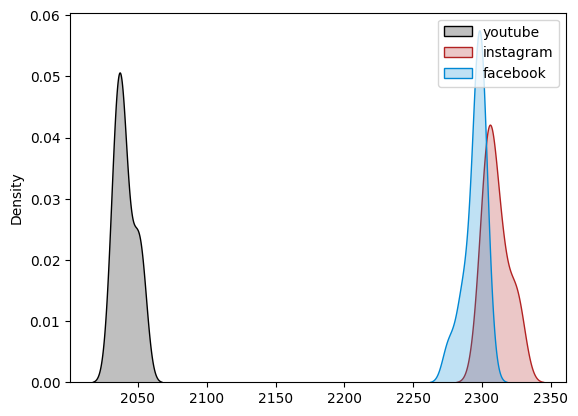

In [ ]:
# Определимся с распределением данных
sns.kdeplot(youtube, label="youtube", fill = True, color = '#000000')
sns.kdeplot(instagram, label="instagram", fill = True, color = '#B22222')
sns.kdeplot(facebook, label="facebook", fill = True, color = '#0088d4')
plt.legend()
plt.show()

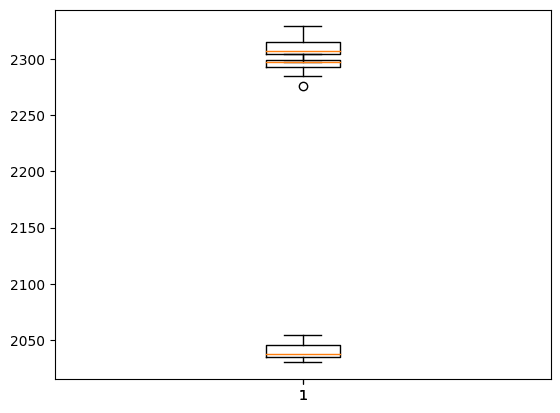

In [ ]:
plt.boxplot(youtube);
plt.boxplot(instagram);
plt.boxplot(facebook);

По наблюдениям видно, что среднее значение youtube значительно ниже instagram и facebook. Средние значения instagram и facebook находятся рядом.

In [ ]:
#np.random.seed(42) #фиксация случайности

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
youtube = st.norm.rvs(loc=2041, scale=10, size=15)
instagram = st.norm.rvs(loc=2310, scale=10, size=15)
facebook = st.norm.rvs(loc=2295, scale=10, size=15)

stat, p = st.ttest_ind(youtube, instagram)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -83.27194, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
youtube = st.norm.rvs(loc=2041, scale=10, size=15)
instagram = st.norm.rvs(loc=2310, scale=10, size=15)
facebook = st.norm.rvs(loc=2295, scale=10, size=15)

stat, p = st.ttest_ind(youtube, facebook)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -57.35275, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
youtube = st.norm.rvs(loc=2041, scale=10, size=15)
instagram = st.norm.rvs(loc=2310, scale=10, size=15)
facebook = st.norm.rvs(loc=2295, scale=10, size=15)

stat, p = st.ttest_ind(instagram, facebook)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 3.67552, p = 0.00100
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
fvalue, pvalue = st.f_oneway(youtube, instagram, facebook)

print(f"Статистика = {fvalue:.5f}, p={pvalue:.5f}")

if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, среднее, вероятно одинаковые')
else:
    print('Отклоняем нулевую гипотезу, среднее, вероятно, различаются')

Статистика = 4199.87654, p=0.00000
Отклоняем нулевую гипотезу, среднее, вероятно, различаются


Средние всех трех категорий отличаются

In [ ]:
stat, p = st.shapiro(youtube)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.950, p = 0.52953
Вероятно нормальное распределение


In [ ]:
stat, p = st.shapiro(instagram)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.966, p = 0.80264
Вероятно нормальное распределение


In [ ]:
stat, p = st.shapiro(facebook)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.922, p = 0.20920
Вероятно нормальное распределение


In [ ]:
chi, pval, dof, exp = st.chi2_contingency(df2.values) #Критерий Пирсона (хи квадрат)
significance = 0.05

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval > significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.")
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.")

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value = 1.000000, уровень значимости = 0.05
0.9999999999999984
На уровене значимости 0.05, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.


А в 6 задаче исходя из распределений выборок корректнее было применить kruskal и posthoc_dunn, а не Anova.